# Sourcing and Loading Data 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing 
import warnings # For handling error messages 
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd") 

In [2]:
df = pd.read_csv('takehome_users.csv', encoding= 'latin-1') 
df = pd.DataFrame(df) 
df

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


In [3]:
df = df.rename(columns={'object_id':'user_id'}) 
df 

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


In [4]:
engagement = pd.read_csv('takehome_user_engagement.csv') 
engagement = pd.DataFrame(engagement) 
engagement 

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [5]:
df['user_id'].nunique() 

12000

# Clean and transform Data 

In [6]:
# Check for nulls 
df.isnull().values.any() 

True

In [7]:
df = df.dropna() 
df.isnull().values.any() 

False

In [8]:
engagement.isnull().values.any() 

False

In [9]:
# selecting only the users who appear at least 3 times 
engage = engagement.groupby('user_id').filter(lambda x: len(x) >= 3)

In [10]:
engage.reset_index(drop=True, inplace = True) # by removing the rows the index is now off, so reset

In [11]:
#this sequence runs through the dataframe, creates a week from a date, and then checks if the next two dates fall within that
#time. Then it ouputs the user_id to a list.
active = 0
active_users = []
for i in range(len(engage)-2):
    user = engage['user_id'][i] #get current user_id
    if user != active and user == engage['user_id'][i+2]: #so we can skip a user that has already been active and to make sure we don't compare to the next user
        st = pd.Timestamp(engage['time_stamp'][i]) #get start date
        et = st + pd.Timedelta('7D') # make range for end date
        if st < pd.Timestamp(engage['time_stamp'][i+1]) < et and st < pd.Timestamp(engage['time_stamp'][i+2]) < et:
            active_users.append(user) # now that the active condition has been met, return that user
            active = user                  #define the user as active

In [12]:
len(active_users)

1602

In [13]:
active_users

[2,
 10,
 20,
 33,
 42,
 43,
 50,
 53,
 63,
 69,
 74,
 80,
 81,
 82,
 87,
 133,
 135,
 141,
 146,
 153,
 160,
 165,
 168,
 172,
 174,
 185,
 188,
 197,
 200,
 202,
 203,
 209,
 214,
 230,
 245,
 247,
 263,
 265,
 275,
 280,
 283,
 297,
 298,
 305,
 310,
 311,
 321,
 322,
 341,
 347,
 351,
 363,
 370,
 383,
 397,
 401,
 418,
 430,
 445,
 450,
 460,
 462,
 469,
 471,
 472,
 479,
 483,
 492,
 494,
 497,
 502,
 506,
 509,
 510,
 512,
 518,
 522,
 529,
 535,
 540,
 547,
 553,
 564,
 572,
 589,
 591,
 601,
 603,
 605,
 618,
 627,
 628,
 632,
 634,
 639,
 669,
 679,
 680,
 724,
 725,
 728,
 754,
 772,
 783,
 786,
 804,
 828,
 845,
 851,
 869,
 874,
 882,
 885,
 901,
 906,
 907,
 912,
 928,
 932,
 934,
 937,
 943,
 953,
 980,
 985,
 1007,
 1009,
 1013,
 1017,
 1018,
 1026,
 1027,
 1035,
 1055,
 1061,
 1072,
 1089,
 1093,
 1094,
 1099,
 1106,
 1107,
 1119,
 1123,
 1124,
 1128,
 1129,
 1136,
 1145,
 1150,
 1151,
 1155,
 1156,
 1163,
 1173,
 1186,
 1196,
 1202,
 1214,
 1222,
 1233,
 1235,
 1238,


In [14]:
y = pd.Series(np.random.randn(len(df)))
n = 0
for i in range(len(df)):
    if df['user_id'].iloc[i] == active_users[n]:
        y[i] = 1
        n = n+1
        if n > len(active_users)-1:
            n = n -1
    else:
        y[i] = 0
y.head()

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
dtype: float64

In [15]:
df1 = pd.DataFrame(y,columns = ['adopted_users']) 
df = pd.concat([df,df1], axis = 1)
df

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_users
0,1.0,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1.0,0.0,11.0,10803.0,0.0
1,2.0,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0.0,0.0,1.0,316.0,1.0
2,3.0,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0.0,0.0,94.0,1525.0,0.0
3,4.0,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0.0,0.0,1.0,5151.0,0.0
4,5.0,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0.0,0.0,193.0,5240.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
11980,11981.0,2013-03-05 01:53:48,Fry Tyler,TylerFry@gmail.com,GUEST_INVITE,1.364868e+09,0.0,0.0,110.0,5775.0,NaN
11981,11982.0,2013-12-06 14:39:15,Barajas Maria,MariaCBarajas@gmail.com,ORG_INVITE,1.386341e+09,1.0,1.0,57.0,2527.0,NaN
11989,11990.0,2013-07-05 21:00:48,Juhl Aase,AasePJuhl@jourrapide.com,ORG_INVITE,1.373144e+09,0.0,0.0,25.0,3944.0,NaN
11995,11996.0,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0.0,0.0,89.0,8263.0,NaN


In [16]:
# This is to turn the invited column into simply a binary 'was invited' or 'not'
inv = pd.Series(np.random.randn(len(df)))
for i in range(len(df)):
    if df['invited_by_user_id'].iloc[i] >=1:
        inv[i] = 1
    else:
        inv[i] = 0
df2 = pd.DataFrame(inv, columns = ['invited'])
df = pd.concat([df,df2], axis = 1) 

In [17]:
df.isnull().sum().sort_values() 

invited                       1733
user_id                       4619
creation_time                 4619
name                          4619
email                         4619
creation_source               4619
last_session_creation_time    4619
opted_in_to_mailing_list      4619
enabled_for_marketing_drip    4619
org_id                        4619
invited_by_user_id            4619
adopted_users                 4619
dtype: int64

In [18]:
df = df.dropna() 

In [19]:
df.isnull().sum().sort_values() 

user_id                       0
creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
adopted_users                 0
invited                       0
dtype: int64

In [20]:
inv.value_counts()

1.0    4776
0.0    2886
dtype: int64

In [21]:
df['creation_source'].value_counts()

ORG_INVITE      1249
GUEST_INVITE     641
Name: creation_source, dtype: int64

In [22]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(['ORG_INVITE','GUEST_INVITE']) 

LabelEncoder()

In [23]:
creation = le.transform(df['creation_source']) 

In [24]:
df3 = pd.DataFrame(creation,columns = ['creation'])
df = pd.concat([df,df3],axis=1) 

# Preprocess Data 

In [25]:
df.columns 

Index(['user_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'adopted_users', 'invited', 'creation'],
      dtype='object')

In [26]:
df.dtypes

user_id                       float64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list      float64
enabled_for_marketing_drip    float64
org_id                        float64
invited_by_user_id            float64
adopted_users                 float64
invited                       float64
creation                      float64
dtype: object

In [27]:
df.isnull().sum().sort_values() 

user_id                       1146
creation_time                 1146
name                          1146
email                         1146
creation_source               1146
last_session_creation_time    1146
opted_in_to_mailing_list      1146
enabled_for_marketing_drip    1146
org_id                        1146
invited_by_user_id            1146
adopted_users                 1146
invited                       1146
creation                      1146
dtype: int64

In [28]:
df = df.dropna() 
df.isnull().sum().sort_values() 

user_id                       0
creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
adopted_users                 0
invited                       0
creation                      0
dtype: int64

In [29]:
X = df[['creation', 'last_session_creation_time', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id']]
y = df['adopted_users'] 

# Modeling 

In [30]:
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [31]:
# split data into train and test sets
seed = 42
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
# fit model to training data
model = XGBClassifier()
model.fit(X_train, y_train) 

[12:51:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\straw\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0)) 

Accuracy: 100.00%


C:\Users\straw\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       224

    accuracy                           1.00       224
   macro avg       1.00      1.00      1.00       224
weighted avg       1.00      1.00      1.00       224



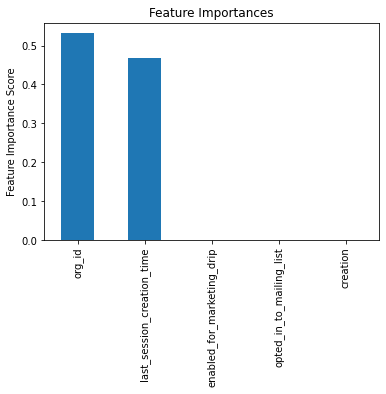

In [33]:

#feat_imp = pd.Series(model.booster().get_fscore()).sort_values(ascending=False)
feat_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred)) 

# Conclusion 

With little optimization this model can predict an active user with 100% accuracy. With that in mind, it appears that the most important features for making this prediction are the "last session creation time" and the organization the user is from. 